In [2]:
from sklearn.svm import SVC

#下記は図示やpandas、numpyのためのライブラリ
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
data = pd.DataFrame({
        "rare":[True,True,True,True,True,False,False,False,False,False,False,False,False],
        "scale":[20, 25, 30, 24, 28, 35, 40, 38, 55, 50, 60,32,25],
        "hige":[10, 20, 40, 18, 30, 10, 20, 30, 25, 28, 30,18,25],
})

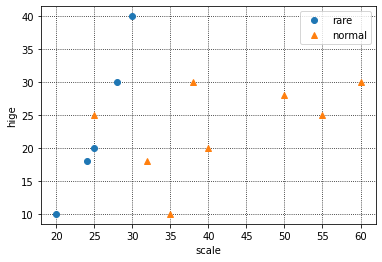

In [12]:
y = data["rare"].values
x1, x2 = data["scale"].values, data["hige"].values 

#データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(x1[y], x2[y], 'o', color='C0', label='rare')#青い点：yがTrue(=珍しい）のもの
plt.plot(x1[~y], x2[~y], '^', color='C1', label='normal')#オレンジの点：yがFalse(=普通）のもの
plt.xlabel("scale")
plt.ylabel("hige")
plt.legend(loc='best')
plt.show()

In [15]:
y = data["rare"].values#先ほどの図示と同じなので割愛してもOK
X = data[["scale", "hige"]].values
X

array([[20, 10],
       [25, 20],
       [30, 40],
       [24, 18],
       [28, 30],
       [35, 10],
       [40, 20],
       [38, 30],
       [55, 25],
       [50, 28],
       [60, 30],
       [32, 18],
       [25, 25]])

In [16]:
C = 10
clf = SVC(C=C,kernel="linear")
clf.fit(X, y) 

SVC(C=10, kernel='linear')

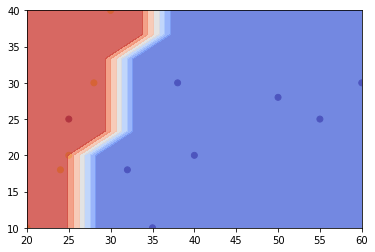

In [17]:
fig,ax = plt.subplots(figsize=(6,4))
#データの点を表示                                                                                                                                                                    
ax.scatter(X[:,0], X[:,1], c=y)

#x座標方向に100個の値を並べる                                                                                                                                                          
x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 10)
#y座標方向に100個の値を並べる                                                                                                                                                        
y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 10)
#x,yを組み合わせた10000個の点のx座標と,y座標の配列                                                                                                                       
x_g, y_g = np.meshgrid(x, y)
#np,c_で二つの座標を結びつけ, SVMに渡す                                                                                                                                      
z_g = clf.predict(np.c_[x_g.ravel(), y_g.ravel()])
#z_gは配列の列になっているが、グラフに表示するために(100, 100)の形に戻す                                                                                                             
z_g = z_g.reshape(x_g.shape)

#境界線の色塗り                                                                                                                                                
ax.contourf(x_g,y_g,z_g,cmap=plt.cm.coolwarm, alpha=0.8);

#最後に表示                                                                                                                                                                  
plt.show()

In [20]:
z = pd.DataFrame({
        "scale":[28, 45],
        "hige":[25, 20],
    })
z2 = z[["scale", "hige"]].values

In [22]:
y_est = clf.predict(z2)
y_est

array([ True, False])